In [1]:
#Import all required libraries for reading data, analysing and visualizing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the training & test data
liver_df = pd.read_csv('project-data.csv', delimiter=';')
liver_df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
# To get a concise summary of the dataframe

liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [4]:
# Statistical information about NUMERICAL columns in the dataset

liver_df.describe(include='all')

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615,615.000000,615,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,615
unique,5,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199
top,no_disease,NaN,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.9
freq,533,NaN,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
mean,NaN,47.408130,NaN,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,NaN
std,NaN,10.055105,NaN,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,NaN
min,NaN,19.000000,NaN,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,NaN
25%,NaN,39.000000,NaN,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,NaN
50%,NaN,47.000000,NaN,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,NaN
75%,NaN,54.000000,NaN,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,NaN


In [5]:
# Features of the dataset (Labels)

liver_df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [6]:
# Check for any null values

liver_df.isnull().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

In [7]:
# Frequency of patients diagnosed and not diagnoised with liver disease
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each category
counts = liver_df['category'].value_counts()
LD, NLD = counts[1], counts[0]

print('Number of patients diagnosed with liver disease: ', LD)
print('Number of patients not diagnosed with liver disease: ', NLD)

plt.show()

Number of patients diagnosed with liver disease:  30
Number of patients not diagnosed with liver disease:  533


C:\Users\kulkarpa\AppData\Local\Temp\ipykernel_14168\1512433929.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LD, NLD = counts[1], counts[0]


Number of patients that are male:  377
Number of patients that are female:  238


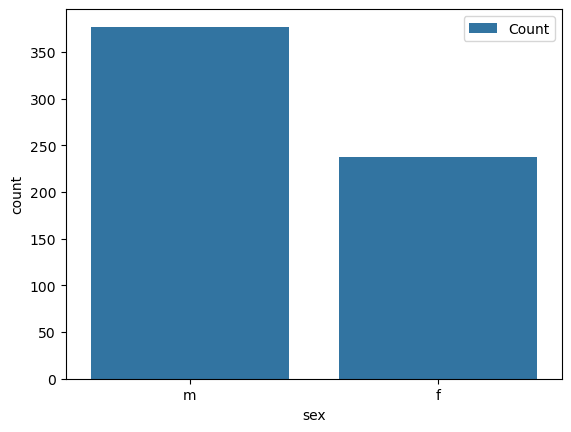

In [8]:
# Frequency of patients based on their gender

sns.countplot(data=liver_df, x = 'sex', label='Count')

M, F = liver_df['sex'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

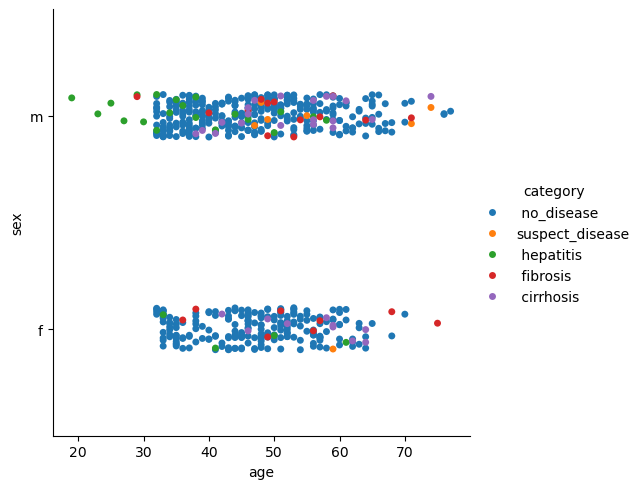

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming liver_df is already loaded with the CSV data
# liver_df = pd.read_csv('liver_patient.csv')

# Use catplot instead of factorplot
sns.catplot(x="age", y="sex", hue="category", data=liver_df, kind="strip")

plt.show()

In [10]:
liver_df[['sex', 'category','age']].groupby(['category','sex'], as_index=False).count().sort_values(by='category', ascending=False)

,category,sex,age
8,suspect_disease,f,1
9,suspect_disease,m,6
6,no_disease,f,215
7,no_disease,m,318
4,hepatitis,f,4
5,hepatitis,m,20
2,fibrosis,f,8
3,fibrosis,m,13
0,cirrhosis,f,10
1,cirrhosis,m,20


In [11]:
liver_df[['sex', 'category','age']].groupby(['category','sex'], as_index=False).mean().sort_values(by='category', ascending=False)

,category,sex,age
8,suspect_disease,f,59.000000
9,suspect_disease,m,57.333333
6,no_disease,f,47.106977
7,no_disease,m,47.147799
4,hepatitis,f,46.250000
5,hepatitis,m,37.200000
2,fibrosis,f,53.750000
3,fibrosis,m,51.461538
0,cirrhosis,f,55.500000
1,cirrhosis,m,52.450000


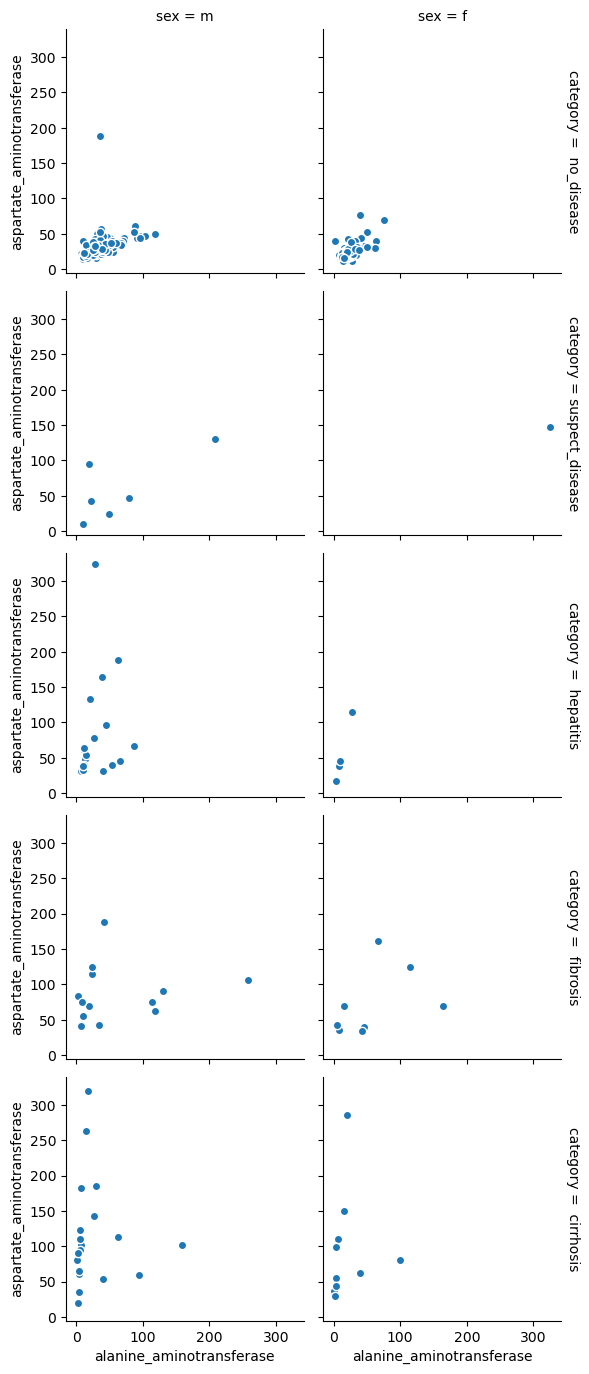

In [12]:
g = sns.FacetGrid(liver_df, col="sex", row="category", margin_titles=True)
g.map(plt.scatter,"alanine_aminotransferase", "aspartate_aminotransferase", edgecolor="w")
plt.subplots_adjust(top=0.9)

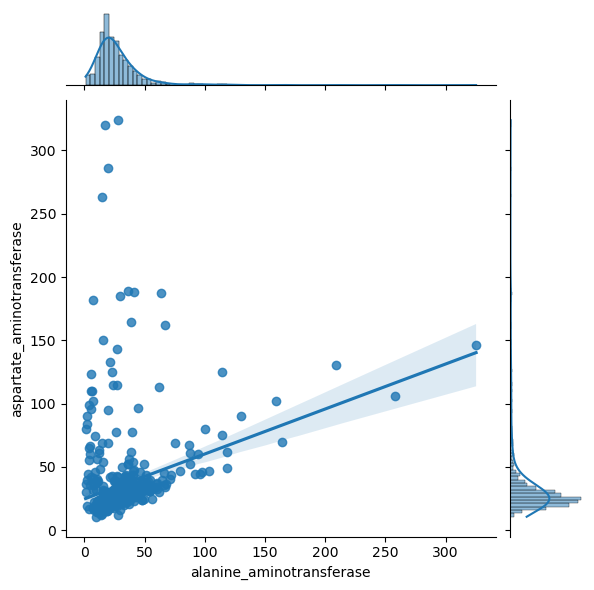

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x="alanine_aminotransferase", y="aspartate_aminotransferase", data=liver_df, kind="reg")

In [14]:
liver_df.head(3)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


In [15]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder on the 'sex' column
liver_df['sex'] = le.fit_transform(liver_df['sex'])

# Check the result
liver_df['sex'].head()

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int32

In [16]:
# Display unique values after encoding
liver_df['sex'].unique()

array([1, 0])

In [17]:
liver_df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
liver_df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [19]:
liver_df.describe()

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,0.613008,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171
std,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000
25%,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000
50%,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000
75%,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000


In [20]:
liver_df[liver_df['albumin'].isnull()]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
603,cirrhosis,65,1,NaN,NaN,40.0,54.0,13.0,7.5,NaN,70.0,107.0,79


In [21]:
liver_df[liver_df['alkaline_phosphatase'].isnull()]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
541,hepatitis,19,1,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75
545,hepatitis,29,1,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90
546,hepatitis,30,1,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77
568,fibrosis,49,1,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81
569,fibrosis,49,1,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82
570,fibrosis,50,1,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84
571,fibrosis,53,1,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76
576,fibrosis,71,1,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76
581,fibrosis,49,0,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79
582,fibrosis,51,0,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72


In [22]:
liver_df[liver_df['alanine_aminotransferase'].isnull()]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
540,hepatitis,38,1,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63


In [23]:
liver_df[liver_df['cholesterol'].isnull()]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
121,no_disease,43,1,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70
319,no_disease,32,0,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,no_disease,33,0,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,no_disease,46,0,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,no_disease,48,0,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,no_disease,48,0,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,no_disease,57,0,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
584,fibrosis,75,0,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72
590,cirrhosis,46,1,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NA
603,cirrhosis,65,1,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79


In [24]:
liver_df["albumin"] = liver_df.albumin.fillna(liver_df['albumin'].mean())
liver_df["alkaline_phosphatase"] = liver_df.alkaline_phosphatase.fillna(liver_df['alkaline_phosphatase'].mean())
liver_df["alanine_aminotransferase"] = liver_df.alanine_aminotransferase.fillna(liver_df['alanine_aminotransferase'].mean())
liver_df["cholesterol"] = liver_df.cholesterol.fillna(liver_df['cholesterol'].mean())

In [25]:
# The input variables/features are all the inputs except Dataset.
# The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
# Dropping Gender and Dataset

X = liver_df.drop(['category'], axis=1)
X.head(3)

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


In [26]:
y = liver_df['category'] 
# 1 for liver disease; 2 for no liver disease

In [27]:
liver_df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

<h1>Model Building</h1>


In [29]:
le = LabelEncoder()

# Encode 'diagnose' column (our target)
liver_df['category'] = le.fit_transform(liver_df['category'])

# Check the unique values in the encoded 'category' column
liver_df['category'].unique()

array([3, 4, 2, 1, 0])

In [30]:
# Separate the input features (X) from the target variable (y)
X = liver_df.drop(columns=['category'])  # Features
y = liver_df['category']  # Target

# Check the shape of X and y
X.shape, y.shape

((615, 12), (615,))

The output (615, 12) indicates that you have 615 instances (rows) and 12 features (columns)
The output (615,) indicates that your target variable y contains 615 instances (rows).

we’ll split the dataset into training and testing sets. Typically, we use an 80-20 split, where 80% of the data is used for training the model, and 20% is held out for testing.

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((492, 12), (123, 12), (492,), (123,))

In summary, 
Training set: 492 samples,
Testing set: 123 samples.

<h1>Logistic Regressiion</h1>

In [36]:
liver_df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,3,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,0,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [37]:
liver_df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [38]:
liver_df.columns = liver_df.columns.str.strip()

In [39]:
liver_df['protein']

0        69
1      76.5
2      79.3
3      75.7
4      68.7
       ... 
610    68.5
611    71.3
612      82
613      71
614      68
Name: protein, Length: 615, dtype: object

In [40]:
if 'protein' in liver_df.columns:
    print("Protein column exists")
else:
    print("Protein column does NOT exist")

Protein column exists


In [41]:
liver_df['protein'].dropna()

0        69
1      76.5
2      79.3
3      75.7
4      68.7
       ... 
610    68.5
611    71.3
612      82
613      71
614      68
Name: protein, Length: 615, dtype: object

In [42]:
print(liver_df['protein'].unique())

['69' '76.5' '79.3' '75.7' '68.7' '74' '74.5' '67.1' '71.3' '69.9' '75.4'
 '68.6' '70.4' '71.9' '72.7' '72.4' '69.3' '68.1' '74.3' '69.1' '69.6'
 '72' '78.9' '67.7' '53.2' '73.1' '78.7' '71' '73.6' '77.1' '75.8' '77.8'
 '67.2' '77.3' '80.7' '79.6' '71.6' '70.8' '73.4' '76.2' '73.8' '79.9'
 '72.3' '80.6' '72.5' '56.3' '76.3' '71.5' '75' '74.7' '75.2' '75.1'
 '76.1' '73.9' '67.4' '70.1' '66.7' '82.6' '75.6' '71.2' '77.2' '78.4'
 '66.3' '66.2' '70.5' '72.2' '75.5' '71.1' '74.1' '68.8' '81.1' '76.6'
 '75.3' '64.1' '73.3' '83.4' '72.1' '73' '71.8' '77.5' '68.4' '80.3'
 '74.2' '70' '72.9' '76.9' '76.8' '70.9' '68' '63.4' '69.2' '70.6' '66.6'
 '70.3' '78.8' '73.7' '62.1' '65' '79.8' '70.2' '73.2' '66.4' '69.5'
 '68.3' '78' '82.1' '81.5' '74.9' '66.8' '68.9' '83.3' '69.8' '65.4'
 '71.4' '79.5' '76.7' '67' '65.8' '64.9' '77.6' '64.4' '64.2' '80.9'
 '68.5' '78.6' '65.2' '67.9' '75.9' '77.7' '62.4' '76' '78.5' '74.6'
 '64.5' '66.9' '74.4' '86.5' '64.8' '70.7' '66' '68.2' '77' '64.3' '67.5'
 '74.8

In [43]:
na_rows = liver_df[liver_df['protein'] == 'NA    ']
na_rows

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
590,0,46,1,20.0,68.28392,62.0,113.0,254.0,1.48,5.368099,114.0,138.0,NA


In [44]:
liver_df = liver_df.drop(index=590)

In [45]:
import numpy as np
liver_df.replace("NA    ", np.nan, inplace=True)
liver_df.dropna(inplace=True)
liver_df.shape

(614, 13)

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Replace 'NA' and any variations with NaN
liver_df.replace('NA', np.nan, inplace=True)

# Option 1: Drop rows with missing values
liver_df.dropna(inplace=True)

# At this point, you can now proceed with model training
X = liver_df.drop(columns=['category'])  # Features
y = liver_df['category']  # Target variable
#Fount Out that we had some missing values, fixing the missing values done.

In [47]:
# Separate the input features (X) from the target variable (y)
X = liver_df.drop(columns=['category'])  # Features
y = liver_df['category']  # Target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Check the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(491, 12) (123, 12) (491,) (123,)


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Initialize the Logistic Regression model
LR = LogisticRegression(max_iter=1000)

# Train the model
LR.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred

In [51]:
list(le.classes_)

[' cirrhosis', ' fibrosis', ' hepatitis', ' no_disease', 'suspect_disease']

<h5>0 could represent "No disease"</h5>
<h5>1 could represent "Suspect disease"</h5>
<h5>2 could represent "Hepatitis C"</h5>
<h5>3 could represent "Fibrosis"</h5>
<h5>4 could represent "Cirrhosis" </h5>

In [53]:
# Evaluate the model

# Predict the values using your model
lr_pred = LR.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, lr_pred)
class_report = classification_report(y_test, lr_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[  4   0   0   1   0]
 [  1   4   2   2   0]
 [  2   0   2   1   0]
 [  0   0   0 103   1]
 [  0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       1.00      0.44      0.62         9
           2       0.50      0.40      0.44         5
           3       0.96      0.99      0.98       104
           4       0.00      0.00      0.00         0

    accuracy                           0.92       123
   macro avg       0.61      0.53      0.54       123
weighted avg       0.93      0.92      0.92       123



C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix
1n the first row, the model correctly predicted 4 instances of class 0, misclassified 1 instance as class 3, and got none wrong for classes 1, 2, and 4.
The last row shows that there were no true instances of class 4 in the test set.

## Key Takeaway from classification reort
#### Class 3 has high precision, recall, and f1-score, indicating it is well-classified by the model.
#### Class 0 has moderate performance with a precision of 0.57 and recall of 0.80.
#### Class 4 has no instances in the test set, which results in 0 for all metrics.
## The overall accuracy of the model is 0.92, meaning it correctly classified 92% of the test instances.


<h1>Random Forest</h1>

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier model
RF = RandomForestClassifier()

# Train the model
RF.fit(X_train_scaled, y_train)

# Make predictions on the test data
rf_pred = RF.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nAccuracy:", accuracy_score(y_test, rf_pred))

Confusion Matrix:
[[  4   0   0   1]
 [  1   3   4   1]
 [  1   0   2   2]
 [  1   0   0 103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       1.00      0.33      0.50         9
           2       0.33      0.40      0.36         5
           3       0.96      0.99      0.98       104

    accuracy                           0.91       123
   macro avg       0.72      0.63      0.63       123
weighted avg       0.92      0.91      0.90       123


Accuracy: 0.9105691056910569


# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree Classifier model
DT = DecisionTreeClassifier()

# Train the model
DT.fit(X_train_scaled, y_train)

# Make predictions on the test data
dt_pred = DT.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))
print("\nAccuracy:", accuracy_score(y_test, dt_pred))

Confusion Matrix:
[[ 2  0  2  0  1]
 [ 1  2  6  0  0]
 [ 2  0  2  1  0]
 [ 2  1  2 99  0]
 [ 0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.67      0.22      0.33         9
           2       0.17      0.40      0.24         5
           3       0.99      0.95      0.97       104
           4       0.00      0.00      0.00         0

    accuracy                           0.85       123
   macro avg       0.42      0.39      0.37       123
weighted avg       0.90      0.85      0.87       123


Accuracy: 0.8536585365853658


C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model
SV = SVC(class_weight='balanced')

# Train the model
SV.fit(X_train_scaled, y_train)

# Make predictions on the test data
sv_pred = SV.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, sv_pred))
print("\nClassification Report:")
print(classification_report(y_test, sv_pred))
print("\nAccuracy:", accuracy_score(y_test, sv_pred))

Confusion Matrix:
[[  4   1   0   0]
 [  2   4   2   1]
 [  1   0   4   0]
 [  1   1   2 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.67      0.44      0.53         9
           2       0.50      0.80      0.62         5
           3       0.99      0.96      0.98       104

    accuracy                           0.91       123
   macro avg       0.66      0.75      0.68       123
weighted avg       0.93      0.91      0.91       123


Accuracy: 0.9105691056910569


# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the KNN model
KN = KNeighborsClassifier(n_neighbors=5)

# Train the model
KN.fit(X_train_scaled, y_train)

# Make predictions on the test data
kn_pred = KN.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, kn_pred))
print("\nClassification Report:")
print(classification_report(y_test, kn_pred))
print("\nAccuracy:", accuracy_score(y_test, kn_pred))


Confusion Matrix:
[[  3   0   0   2]
 [  1   2   0   6]
 [  1   1   1   2]
 [  0   0   0 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.67      0.22      0.33         9
           2       1.00      0.20      0.33         5
           3       0.91      1.00      0.95       104

    accuracy                           0.89       123
   macro avg       0.79      0.51      0.56       123
weighted avg       0.89      0.89      0.87       123


Accuracy: 0.8943089430894309


# HYPERPARAMETER TUNING (SVM)

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
SV_best = grid_search.best_estimator_

# Make predictions with the best model
sv_pred_best = SV_best.predict(X_test_scaled)

# Evaluate the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, sv_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, sv_pred_best))
print("\nAccuracy:", accuracy_score(y_test, sv_pred_best))


Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Confusion Matrix:
[[  3   0   0   1   1]
 [  1   3   2   3   0]
 [  1   0   4   0   0]
 [  1   0   1 102   0]
 [  0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      0.33      0.50         9
           2       0.57      0.80      0.67         5
           3       0.96      0.98      0.97       104
           4       0.00      0.00      0.00         0

    accuracy                           0.91       123
   macro avg       0.61      0.54      0.54       123
weighted avg       0.93      0.91      0.91       123


Accuracy: 0.9105691056910569


C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulkarpa\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  Cross-Validation

In [66]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(SV_best, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.91919192 0.89795918 0.93877551 0.92857143 0.91836735]
Average accuracy: 0.9205730777159349


# Model Finilization

In [68]:
SV_final = SVC(C=1, gamma='auto', kernel='poly', class_weight='balanced')
SV_final.fit(X_train_scaled, y_train)

SVC(C=1, class_weight='balanced', gamma='auto', kernel='poly')

In [69]:
# Saving Model for deployment
import joblib

# Save the model
joblib.dump(SV_final, 'svm_liver_disease_model.pkl')

# Save the scaler (if used)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Model deployment with steamlit 

In [138]:
# Importing necessary libraries for data handling and model building
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import pickle

# Load dataset (update the path to your dataset file)
data_path = 'C:/Users/kulkarpa/Desktop/assignments ExcelR/Project/project-data.csv'
liver_df = pd.read_csv(data_path, delimiter=';')  # Update delimiter if necessary

# Preprocessing Steps
# Handle missing values (drop or impute)
liver_df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
liver_df['sex'] = le.fit_transform(liver_df['sex'])

# Splitting features and target variable
X = liver_df.drop('category', axis=1)  # Assuming 'category' is the target variable
y = liver_df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the scaler and model as .pkl files
scaler_path = 'C:/Users/kulkarpa/Desktop/assignments ExcelR/Project/scaler.pkl'
model_path = 'C:/Users/kulkarpa/Desktop/assignments ExcelR/Project/svm_liver_disease_model.pkl'

with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(model_path, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

# Print model accuracy for verification
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Scaler saved to: {scaler_path}")
print(f"Model saved to: {model_path}")



Model Accuracy: 93.22%
Scaler saved to: C:/Users/kulkarpa/Desktop/assignments ExcelR/Project/scaler.pkl
Model saved to: C:/Users/kulkarpa/Desktop/assignments ExcelR/Project/svm_liver_disease_model.pkl


In [140]:
print("Training features:", list(X.columns))

Training features: ['age', 'sex', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina', 'gamma_glutamyl_transferase ', 'protein   ']
